In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)


In [3]:
df = pd.read_csv('Данные.csv', sep=';')

In [4]:
df.head()

,k,lu,P0,I,gamma,sgamma,r,Psat,Lsat,loptim,lres,loptim/lres,Psat/Pall,Lsat/lu,f,rho,P0/Pall
0,3.89,3.69,12800000.0,80.0,2650.0,0.0,0.0001,1.430000e+08,18.5,2.261250e-08,2.257770e-08,0.001542,0.00132,5.01,0.736,0.000965,1.180000e-04
1,3.89,3.69,12800.0,80.0,1000.0,0.0,0.0001,9.800000e+07,16.7,1.585280e-07,1.580440e-07,0.003065,0.00240,4.52,0.736,0.002550,3.130000e-07
2,3.98,3.69,150000.0,500.0,2830.0,0.0,0.0001,1.130000e+09,20.3,2.061380e-08,2.057220e-08,0.002024,0.00156,5.49,0.735,0.001690,2.070000e-07
3,3.98,3.69,1500000.0,500.0,3160.0,0.0,0.0001,1.100000e+09,18.3,1.648760e-08,1.645770e-08,0.001814,0.00136,4.96,0.735,0.001510,1.850000e-06
4,3.98,3.69,150000.0,500.0,2650.0,0.0,0.0001,1.180000e+09,19.4,2.356200e-08,2.351110e-08,0.002164,0.00175,5.25,0.735,0.001800,2.210000e-07


In [5]:
df = df.dropna()

Look at the power distribution. 

Text(0.5, 1.0, 'Power hist')

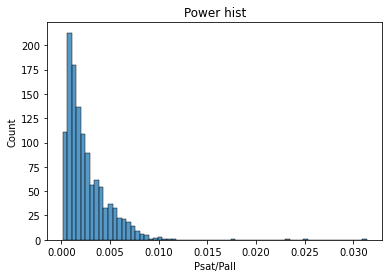

In [6]:
sns.histplot(df, x='Psat/Pall')
plt.title("Power hist")

Delete all the blowout(rho>0.012) 

In [7]:
df = df[df['Psat/Pall']<0.01]

Create a new feature log(Psat/Pall)

In [8]:
df['log'] = np.log(df[['Psat/Pall']])

In [9]:
df['log0'] = np.log(df['P0']/df['I']/df['gamma']/511000)

Text(0.5, 1.0, 'Power hist')

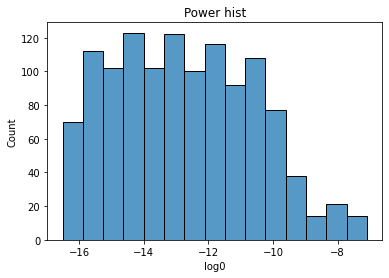

In [10]:
sns.histplot(df, x='log0')
plt.title("Power hist")

Text(0.5, 1.0, 'Power hist')

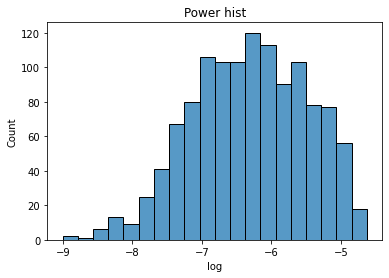

In [11]:
sns.histplot(df, x='log')
plt.title("Power hist")

Text(0.5, 1.0, 'L_sat hist')

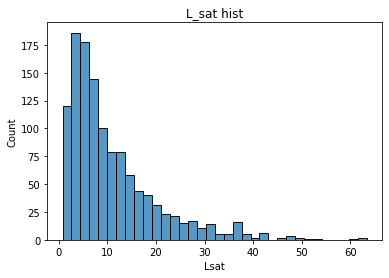

In [12]:
sns.histplot(df, x='Lsat')
plt.title("L_sat hist")

Text(0.5, 1.0, 'L_sat hist')

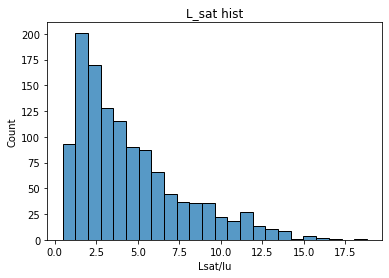

In [13]:
sns.histplot(df, x='Lsat/lu')
plt.title("L_sat hist")

Text(0.5, 1.0, 'lambda')

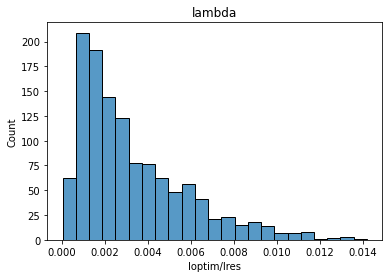

In [14]:
sns.histplot(df, x='loptim/lres')
plt.title("lambda")

Text(0.5, 1.0, 'rho')

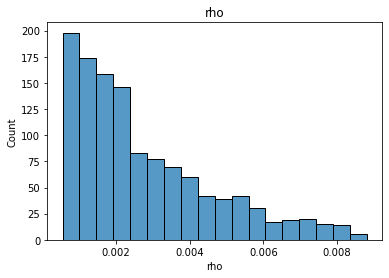

In [15]:
sns.histplot(df, x='rho')
plt.title("rho")

<AxesSubplot:xlabel='optim', ylabel='Count'>

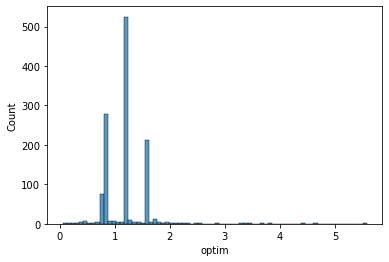

In [16]:
df['optim'] = df['loptim/lres']/df['rho']
sns.histplot(df, x='optim')



In [17]:
df = df[df['optim']<2]

In [18]:
df1 = df.drop(columns=['P0', 'optim', 'P0/Pall', 'Psat', 'Lsat', 'loptim','lres', 'loptim/lres', 'Psat/Pall', 'Lsat/lu', 'f', 'rho', 'log'])

In [19]:
df1.tail()

,k,lu,I,gamma,sgamma,r,log0
1216,1.81,3.01,8000.0,316.0,0.0005,0.0007,-11.930311
1217,1.81,3.01,8000.0,1000.0,0.0005,0.0007,-10.779739
1218,1.81,3.01,8000.0,245.0,0.0005,0.0007,-11.675827
1219,3.73,3.80,70.0,173.0,0.0005,0.0007,-12.270861
1220,1.68,3.80,600.0,707.0,0.0005,0.0007,-13.493886


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1, df['log'], test_size=0.2, random_state=42)

In [21]:
from sklearn.metrics import mean_absolute_percentage_error

clf1 = RandomForestRegressor(max_depth=20, random_state=0)
clf1.fit(X_train, y_train)
mean_absolute_percentage_error(np.exp(y_test), np.exp(clf1.predict(X_test)))

0.21669387034101634

Try to scale the data. It doesn't make sense. 

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

clf = RandomForestRegressor(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
mean_absolute_percentage_error(np.exp(y_test), np.exp(clf.predict(X_test)))

0.2179548378686935

Train the classificator for the saturation length.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Lsat/lu'], test_size=0.2, random_state=42)


clf2 = RandomForestRegressor(max_depth=20, random_state=0)
clf2.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, clf2.predict(X_test))

0.14649661932271205

The classificator for the optimum wavelength.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['optim'], test_size=0.2, random_state=42)



clf3 = RandomForestRegressor(max_depth=20, random_state=0)
clf3.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, clf3.predict(X_test))

0.20681405803250896

In [25]:
from scipy.special import jv

X = pd.DataFrame({'k':[2.13], 'lu':[2.8], 'I':[53], 'gamma':[300], 'sgamma':[0.0002], 
                  'r':[0.00012], 'log0':[2000]})

ksi = X['k']**2/(1+X['k']**2/2)/4
f = jv(0,ksi)-jv(1,ksi)

rho = 1/2/(X['gamma'])*(X['I']/X['r']**2/np.pi/4/np.pi/17000*(X['lu']/100*X['k']*f)**2)**(1/3)
X['log0'] = np.log(X['log0']/X['I']/X['gamma']/511000)


print('P_sat=', (np.exp(clf1.predict(X))*X['gamma']*511000*X['I'])[0])
print('L_sat=', (clf2.predict(X)*X['lu'])[0])
print('l_optim=', ((clf3.predict(X)*rho+1)*X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])
print('l_res=', (X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])

P_sat= 15496801.895149125
L_sat= 14.050679999999995
l_optim= 5.107514790101334e-07
l_res= 5.084255555555554e-07


In [26]:
y_pred = clf1.predict(df1)
err = abs(2*(np.exp(y_pred)-df['Psat/Pall'])/(np.exp(y_pred)+df['Psat/Pall']))
err.sort_values()

507     0.000064
89      0.000219
1106    0.000227
491     0.000515
847     0.000778
          ...   
435     0.791154
440     0.793620
607     0.795446
1010    0.916353
564     1.007270
Name: Psat/Pall, Length: 1191, dtype: float64

In [27]:
y_pred = clf2.predict(df1)
err = abs(2*(y_pred-df['Lsat'])/(y_pred+df['Lsat']))
err.sort_values()

422     0.001634
949     0.001878
950     0.003384
329     0.004172
698     0.004246
          ...   
1168    1.273169
963     1.278396
367     1.281053
376     1.341092
436     1.346707
Name: Lsat, Length: 1191, dtype: float64

In [28]:
y_pred = clf3.predict(df1)
err = abs(2*(y_pred-df['optim'])/(y_pred+df['optim']))
err.sort_values()

77      0.000002
220     0.000041
153     0.000097
1215    0.000197
146     0.000202
          ...   
681     1.015490
685     1.273622
686     1.364687
790     1.560212
705     1.688272
Name: optim, Length: 1191, dtype: float64

Do the same with gradient boosting. 

In [29]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from IPython.display import clear_output

In [30]:
def objective(trial, X_train, y_train, X_test, y_test):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'rmse',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = mean_squared_error(y_test, y_pred)
    return accuracy


def objective_cv(trial):
    fold = KFold(n_splits=3, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        scores.append(objective(trial, X.iloc[train_index], y.iloc[train_index],  
                                X.iloc[test_index], y.iloc[test_index]))
        
    return np.mean(scores)
    

In [31]:
X = df1
y = df['log']


In [32]:
study = optuna.create_study(direction='minimize')


[I 2023-03-13 20:06:46,369] A new study created in memory with name: no-name-785614fb-b095-4b01-a6c6-995d360942a0


In [33]:
study.optimize(objective_cv, n_trials=1000)
clear_output()


In [34]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


Number of finished trials: 1000
Best trial:
  Value: 0.0458797452806228
  Params: 
    max_depth: 4
    learning_rate: 0.10465503856287643
    n_estimators: 449
    min_child_weight: 6
    gamma: 1.098115342012178e-07
    subsample: 0.49175034971224146
    colsample_bytree: 0.9138928698307978
    reg_alpha: 0.00021253591155550908
    reg_lambda: 8.693022625740911e-07


In [35]:
params = trial.params
model1 = xgb.XGBRegressor(**params)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['log'], test_size=0.2, random_state=42)
model1.fit(X_train,y_train)

mean_absolute_percentage_error(np.exp(y_test), np.exp(model1.predict(X_test)))


0.15204493645184158

In [37]:
def scores(trial,X,y):
    fold = KFold(n_splits=3, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        params = trial.params
        model = xgb.XGBRegressor(**params)
        model.fit(X.iloc[train_index],y.iloc[train_index])
        scores.append(mean_absolute_percentage_error(np.exp(y.iloc[test_index]),
                                                     np.exp(model.predict(X.iloc[test_index]))))

        
    return np.mean(scores)





print(scores(trial,X,y))
    

0.1547349584718072


In [38]:
X = df1
y = df['Lsat/lu']

In [39]:
study = optuna.create_study(direction='minimize')

[I 2023-03-13 20:13:46,095] A new study created in memory with name: no-name-944b6c44-d9a8-45de-adbb-14c4b1810848


In [40]:
study.optimize(objective_cv, n_trials=1000)
clear_output()


In [41]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 1000
Best trial:
  Value: 0.5311451540797182
  Params: 
    max_depth: 7
    learning_rate: 0.10042229242551616
    n_estimators: 366
    min_child_weight: 9
    gamma: 0.006326788276116681
    subsample: 0.3918396608990294
    colsample_bytree: 0.9189543296845125
    reg_alpha: 0.0026731229264837122
    reg_lambda: 3.127099212212992e-07


In [42]:
params = trial.params
model2 = xgb.XGBRegressor(**params)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Lsat/lu'], test_size=0.2, random_state=42)

In [44]:
model2.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, model2.predict(X_test))

0.11698236903427038

In [45]:
def scores2(trial,X,y):
    fold = KFold(n_splits=3, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        params = trial.params
        model = xgb.XGBRegressor(**params)
        model.fit(X.iloc[train_index],y.iloc[train_index])
        scores.append(mean_absolute_percentage_error((y.iloc[test_index]),
                                                     (model.predict(X.iloc[test_index]))))

        
    return np.mean(scores)





print(scores2(trial,X,y))

0.14493326799758777


In [46]:
X = df1
y = df['optim']

In [47]:
study = optuna.create_study(direction='minimize')

[I 2023-03-13 20:21:54,444] A new study created in memory with name: no-name-41295cf9-ddb5-414b-869a-ad4aaf2c63de


In [48]:
study.optimize(objective_cv, n_trials=1000)
clear_output()


In [49]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 1000
Best trial:
  Value: 0.07296690897489365
  Params: 
    max_depth: 4
    learning_rate: 0.10444525763827149
    n_estimators: 59
    min_child_weight: 10
    gamma: 0.000568821975213967
    subsample: 0.41996250659895856
    colsample_bytree: 0.9236544000693715
    reg_alpha: 0.0023583804501180906
    reg_lambda: 1.3210739827176488e-07


In [50]:
params = trial.params
model3 = xgb.XGBRegressor(**params)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['optim'], test_size=0.2, random_state=42)

In [52]:
model3.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, model3.predict(X_test))

0.2045815322055699

In [53]:
def scores2(trial,X,y):
    fold = KFold(n_splits=3, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        params = trial.params
        model = xgb.XGBRegressor(**params)
        model.fit(X.iloc[train_index],y.iloc[train_index])
        scores.append(mean_absolute_percentage_error((y.iloc[test_index]),
                                                     (model.predict(X.iloc[test_index]))))

        
    return np.mean(scores)





print(scores2(trial,X,y))

0.25287090180364863


In [58]:
from scipy.special import jv

X = pd.DataFrame({'k':[2.13], 'lu':[2.8], 'I':[53], 'gamma':[300], 'sgamma':[0.0002], 
                  'r':[0.0001], 'log0':[2000]})

ksi = X['k']**2/(1+X['k']**2/2)/4
f = jv(0,ksi)-jv(1,ksi)

rho = 1/2/(X['gamma'])*(X['I']/X['r']**2/np.pi/4/np.pi/17000*(X['lu']/100*X['k']*f)**2)**(1/3)
X['log0'] = np.log(X['log0']/X['I']/X['gamma']/511000)




print('P_sat=', (np.exp(model1.predict(X))*X['gamma']*511000*X['I'])[0])
print('L_sat=', (model2.predict(X)*X['lu'])[0])
print('l_optim=', ((model3.predict(X)*rho+1)*X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])
print('l_res=', (X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])

P_sat= 17711039.693746716
L_sat= 13.39444007873535
l_optim= 5.108687585491209e-07
l_res= 5.084255555555554e-07


In [55]:
len(df)

1191